<a href="https://colab.research.google.com/github/ajlorenzetti/Main/blob/main/How_to_Score_Runs_2021_MLB_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy.stats import ttest_1samp as ttest
import statistics as ss
from sklearn.linear_model import LinearRegression
import seaborn as sn
import statsmodels
import csv
from sklearn.cluster import KMeans
from sklearn import metrics
import math

df = pd.read_csv("Batting Statistics - AL Standard.csv")
df2 = pd.read_csv("Batting Statistics - AL Advanced.csv")
df3 = pd.read_csv("Batting Statistics - NL Standard.csv")
df4 = pd.read_csv("Batting Statistics - NL Advanced.csv")

In [ ]:
df

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,RSQ
0,Baltimore Orioles,62,26.7,4.07,162,5983,5420,659,1296,266,15,195,632,54,23,451,1454,0.239,0.304,0.402,0.705,90,2177,105,65,14,31,12,1033,434281
1,Boston Red Sox,56,28.0,5.12,162,6122,5495,829,1434,330,23,219,783,40,21,512,1386,0.261,0.328,0.449,0.777,104,2467,100,61,10,42,22,1071,687241
2,Chicago White Sox,47,28.0,4.91,162,6084,5357,796,1373,275,22,190,757,57,20,586,1389,0.256,0.336,0.422,0.758,107,2262,139,78,24,39,10,1111,633616
3,Cleveland Indians,48,26.7,4.43,162,5907,5332,717,1269,248,22,203,686,109,17,453,1387,0.238,0.303,0.407,0.710,93,2170,105,64,20,36,18,969,514089
4,Detroit Tigers,49,28.1,4.30,162,5979,5376,697,1299,236,37,179,675,88,25,490,1514,0.242,0.308,0.399,0.707,97,2146,113,44,17,50,8,1006,485809
5,Houston Astros,52,28.9,5.33,162,6291,5593,863,1496,299,14,221,834,53,16,569,1222,0.267,0.339,0.444,0.783,113,2486,136,64,9,54,25,1134,744769
6,Kansas City Royals,48,29.3,4.23,162,5993,5427,686,1349,251,29,163,647,124,33,421,1258,0.249,0.306,0.396,0.702,88,2147,100,55,31,52,8,1036,470596
7,Los Angeles Angels,64,29.2,4.46,162,6016,5437,723,1331,265,23,190,691,79,26,464,1394,0.245,0.310,0.407,0.717,94,2212,107,59,30,25,35,1015,522729
8,Minnesota Twins,57,28.3,4.50,162,6078,5431,729,1311,271,17,228,690,54,15,525,1405,0.241,0.314,0.423,0.738,103,2300,122,70,7,42,17,1063,531441
9,New York Yankees,59,29.3,4.39,162,6060,5331,711,1266,213,12,222,666,63,18,621,1482,0.237,0.322,0.407,0.729,100,2169,154,63,10,34,14,1073,505521


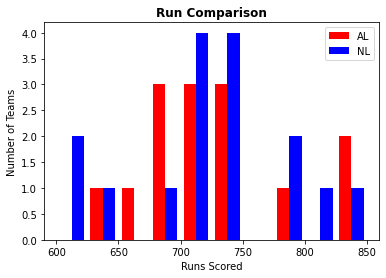

In [ ]:
# Plot two datasets in one histogram

plt.hist([df.R, df3.R], color = ['r','b'],
         bins = [600,625,650,675,700,725,750,775,800,825,850])
plt.title('Run Comparison',fontweight = 'bold')
plt.legend(['AL','NL'])
plt.xlabel("Runs Scored")
plt.ylabel("Number of Teams")
plt.show()

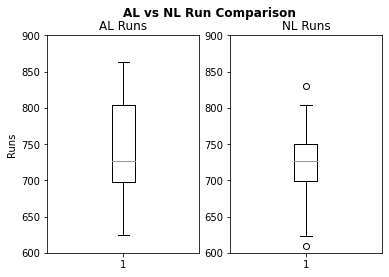

In [ ]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
_ = plt.boxplot(df.R)
plt.title("AL Runs")
plt.ylabel("Runs")
plt.ylim(600,900)

plt.subplot(1, 2, 2) # index 2
_ = plt.boxplot(df3.R)
plt.title("NL Runs")
plt.ylim(600,900)

plt.suptitle('AL vs NL Run Comparison',fontweight = 'bold')

plt.show()

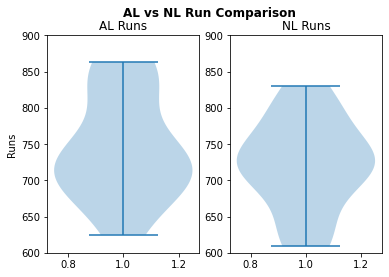

In [ ]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
_ = plt.violinplot(df.R)
plt.title("AL Runs")
plt.ylabel("Runs")
plt.ylim(600,900)

plt.subplot(1, 2, 2) # index 2
_ = plt.violinplot(df3.R)
plt.title("NL Runs")
plt.ylim(600,900)

plt.suptitle('AL vs NL Run Comparison',fontweight = 'bold')

plt.show()

In [ ]:
df_corr = pd.read_csv("Batting Statistics - AL Standard.csv", index_col = "Tm")

del df_corr["G"]

corrs = df_corr.corr(method = 'pearson')

corrs

,#Bat,BatAge,R/G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,RSQ
#Bat,1.000000,-0.245554,0.056767,0.092499,0.195083,0.057438,-0.077577,0.046931,-0.371792,0.440114,0.068140,-0.360945,0.165610,0.083415,0.267479,-0.148038,-0.067530,0.130731,0.063353,0.075350,0.150540,-0.226778,-0.101857,-0.397246,-0.625207,0.348115,-0.112890,0.065850
BatAge,-0.245554,1.000000,0.110599,0.376342,0.104183,0.111102,0.134915,0.057196,0.074363,-0.123503,0.054534,-0.000429,-0.066721,0.326987,-0.179203,0.133140,0.291691,0.010593,0.112242,0.146223,0.026672,0.254606,0.317116,0.296530,0.455689,0.289447,0.495598,0.091377
R/G,0.056767,0.110599,1.000000,0.828774,0.664878,0.999981,0.788684,0.783918,-0.019382,0.696923,0.993986,-0.378602,-0.051535,0.557173,-0.299560,0.758726,0.876684,0.893912,0.923214,0.936297,0.903811,-0.004425,0.135072,-0.378389,0.317065,0.498429,0.651296,0.999027
PA,0.092499,0.376342,0.828774,1.000000,0.755122,0.828107,0.653897,0.654784,-0.091543,0.519579,0.810062,-0.484293,0.000248,0.688994,-0.205996,0.564744,0.802356,0.650932,0.731206,0.815243,0.713614,0.100287,0.312889,-0.476404,0.456258,0.488959,0.842952,0.833034
AB,0.195083,0.104183,0.664878,0.755122,1.000000,0.664236,0.789007,0.748225,0.043908,0.386678,0.678730,-0.255777,0.157674,0.075036,-0.449474,0.669831,0.502326,0.637553,0.613805,0.550247,0.749114,-0.162311,-0.122693,-0.314269,0.338930,0.548733,0.480108,0.684484
R,0.057438,0.111102,0.999981,0.828107,0.664236,1.000000,0.789118,0.783034,-0.017855,0.695835,0.994112,-0.377703,-0.049363,0.556854,-0.299607,0.759521,0.877001,0.893682,0.923186,0.936350,0.903476,-0.004569,0.133081,-0.375855,0.317026,0.497130,0.651269,0.998998
H,-0.077577,0.134915,0.788684,0.653897,0.789007,0.789118,1.000000,0.787989,-0.035205,0.469306,0.803084,-0.316296,-0.156411,0.146626,-0.659687,0.984308,0.794604,0.860943,0.871235,0.701854,0.898245,0.189185,-0.216870,-0.088643,0.359823,0.367552,0.621398,0.796760
2B,0.046931,0.057196,0.783918,0.654784,0.748225,0.783034,0.787989,1.000000,0.028842,0.462775,0.772008,-0.455416,-0.062051,0.149819,-0.360527,0.742344,0.646948,0.798445,0.772842,0.644149,0.834459,-0.224140,0.161022,-0.214508,0.269846,0.518649,0.540685,0.784420
3B,-0.371792,0.074363,-0.019382,-0.091543,0.043908,-0.017855,-0.035205,0.028842,1.000000,-0.462520,-0.030829,0.495085,0.672267,-0.236288,0.303804,-0.040733,-0.202879,-0.171833,-0.190556,-0.108049,-0.140160,-0.419324,-0.260790,0.329149,0.292074,0.066076,-0.258628,-0.014460
HR,0.440114,-0.123503,0.696923,0.519579,0.386678,0.695835,0.469306,0.462775,-0.462520,1.000000,0.694272,-0.477476,-0.360149,0.488681,-0.178581,0.447372,0.611346,0.816933,0.777154,0.788143,0.782076,0.127668,0.047908,-0.684199,-0.061713,0.330033,0.375474,0.692153


In [ ]:
corrs.loc["R","R"]

1.0

In [ ]:
df_corr_ALA = pd.read_csv("Batting Statistics - AL Advanced.csv", index_col = "Tm")

corrs_ALA = df_corr_ALA.corr(method = 'pearson')

corrs_ALA

,R,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%
R,1.000000,0.927605,0.926465,0.599435,0.822537,0.610385,-0.461135,0.385919,0.658981,0.639957,0.520258,-0.420148,0.336202,-0.440484,0.115969,-0.101273,-0.021243,0.857773,0.908074,0.989119,0.835261,-0.297490,0.265042
rOBA,0.927605,1.000000,0.907733,0.654244,0.834578,0.671854,-0.560439,0.427054,0.818616,0.782699,0.637516,-0.370878,0.284026,-0.383856,0.045868,-0.073013,0.030947,0.767642,0.809838,0.906581,0.648098,-0.179633,0.168480
Rbat+,0.926465,0.907733,1.000000,0.470125,0.825592,0.679690,-0.337962,0.594556,0.731093,0.710197,0.465381,-0.364827,0.385618,-0.408810,0.206811,-0.157970,-0.059454,0.826353,0.842061,0.951218,0.657239,-0.191019,0.260755
BAbip,0.599435,0.654244,0.470125,1.000000,0.335574,0.059097,-0.301528,0.065251,0.320510,0.314107,0.709966,-0.110583,-0.096081,-0.087062,-0.299320,-0.302994,0.514405,0.380850,0.524898,0.543303,0.511023,-0.424282,0.216283
ISO,0.822537,0.834578,0.825592,0.335574,1.000000,0.919829,-0.283951,0.340695,0.800762,0.736954,0.517418,-0.545575,0.434527,-0.572359,0.296659,-0.321704,-0.034140,0.666638,0.684118,0.810922,0.565774,-0.224108,0.154478
HR%,0.610385,0.671854,0.679690,0.059097,0.919829,1.000000,-0.206828,0.379869,0.763664,0.698664,0.371930,-0.500057,0.425503,-0.526645,0.292145,-0.239469,-0.089420,0.507923,0.490924,0.609853,0.271795,-0.061966,-0.083150
SO%,-0.461135,-0.560439,-0.337962,-0.301528,-0.283951,-0.206828,1.000000,0.166201,-0.437584,-0.355105,-0.372987,0.253021,-0.199610,0.214882,-0.051932,-0.486159,0.395077,-0.256646,-0.284801,-0.410051,-0.388574,-0.267308,0.060010
BB%,0.385919,0.427054,0.594556,0.065251,0.340695,0.379869,0.166201,1.000000,0.376564,0.443610,0.097821,0.021701,0.103556,-0.039611,0.096000,-0.047541,-0.034415,0.581348,0.489881,0.448810,0.034565,-0.143091,-0.062541
EV,0.658981,0.818616,0.731093,0.320510,0.800762,0.763664,-0.437584,0.376564,1.000000,0.977457,0.429474,-0.382110,0.423485,-0.409515,0.212611,-0.087152,-0.128298,0.585867,0.580566,0.625984,0.293746,-0.019839,-0.039073
HardH%,0.639957,0.782699,0.710197,0.314107,0.736954,0.698664,-0.355105,0.443610,0.977457,1.000000,0.361602,-0.348354,0.421984,-0.379249,0.167589,-0.066183,-0.103463,0.652368,0.608494,0.610883,0.284936,-0.026030,-0.060477


In [ ]:
df_corr_NL = pd.read_csv("Batting Statistics - NL Standard.csv", index_col = "Tm")

del df_corr_NL["G"]

corrs_NL = df_corr_NL.corr(method = 'pearson')

corrs_NL

,#Bat,BatAge,R/G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,RSQ
#Bat,1.000000,-0.010346,-0.427750,-0.200258,-0.252596,-0.417303,-0.521202,-0.463719,-0.003207,-0.275432,-0.433793,-0.139181,0.251902,-0.017249,0.448187,-0.516869,-0.257375,-0.464954,-0.424560,-0.199805,-0.471944,0.214573,0.188499,-0.535056,-0.490176,-0.342711,0.024386,-0.402844
BatAge,-0.010346,1.000000,0.580651,0.589710,0.512867,0.593997,0.412449,0.212450,-0.155652,0.625414,0.579675,-0.187774,-0.523623,0.480074,0.361498,0.273905,0.460218,0.590796,0.584459,0.546232,0.644060,0.208748,0.258914,0.109479,-0.129901,0.346901,0.193458,0.593930
R/G,-0.427750,0.580651,1.000000,0.769426,0.554680,0.999633,0.659708,0.429082,-0.315712,0.882582,0.998781,-0.185731,-0.469469,0.678022,-0.012902,0.545364,0.737975,0.920580,0.914213,0.628889,0.949802,-0.035241,0.352063,0.138979,0.519545,0.477305,0.214107,0.998288
PA,-0.200258,0.589710,0.769426,1.000000,0.879234,0.779809,0.670191,0.634302,-0.118872,0.474624,0.758119,-0.269298,-0.470734,0.847447,-0.121292,0.401400,0.675144,0.566565,0.638255,0.520663,0.694772,0.049200,0.114218,-0.084496,0.442082,0.517943,0.627056,0.781871
AB,-0.252596,0.512867,0.554680,0.879234,1.000000,0.561669,0.620675,0.732586,0.157597,0.227545,0.548280,-0.238295,-0.514696,0.546955,-0.004596,0.294423,0.364856,0.359967,0.391535,0.238674,0.530880,-0.127791,-0.184044,-0.064441,0.287821,0.350159,0.504651,0.563837
R,-0.417303,0.593997,0.999633,0.779809,0.561669,1.000000,0.661067,0.428250,-0.320534,0.882401,0.998515,-0.186357,-0.467834,0.687817,-0.011461,0.543584,0.743908,0.918653,0.914722,0.637462,0.949540,-0.022762,0.361316,0.135228,0.518620,0.480685,0.225012,0.998782
H,-0.521202,0.412449,0.659708,0.670191,0.620675,0.661067,1.000000,0.646334,-0.096782,0.433377,0.652392,-0.371756,-0.350820,0.481458,-0.433324,0.931453,0.820702,0.717981,0.793182,0.637378,0.778650,0.357623,0.090194,0.339031,0.282312,0.574480,0.542107,0.656340
2B,-0.463719,0.212450,0.429082,0.634302,0.732586,0.428250,0.646334,1.000000,-0.021570,0.093903,0.420728,-0.446291,-0.424871,0.372995,-0.303058,0.445600,0.388964,0.354989,0.391204,0.183450,0.469091,0.020341,-0.204650,0.144407,0.279923,0.246565,0.463505,0.410754
3B,-0.003207,-0.155652,-0.315712,-0.118872,0.157597,-0.320534,-0.096782,-0.021570,1.000000,-0.491443,-0.329653,0.055023,-0.018284,-0.214180,-0.065276,-0.188757,-0.378924,-0.394532,-0.408048,-0.413838,-0.324141,-0.326631,-0.690287,0.264694,-0.194658,-0.195816,0.023333,-0.314592
HR,-0.275432,0.625414,0.882582,0.474624,0.227545,0.882401,0.433377,0.093903,-0.491443,1.000000,0.892538,-0.086512,-0.362404,0.450592,0.218578,0.428751,0.595560,0.925047,0.869287,0.643631,0.887206,0.009553,0.531229,0.124511,0.371585,0.377358,-0.089253,0.883924


In [ ]:
df_corr_NLA = pd.read_csv("Batting Statistics - NL Advanced.csv", index_col = "Tm")

corrs_NLA = df_corr_NLA.corr(method = 'pearson')

corrs_NLA

,R,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%
R,1.000000,0.896644,0.562067,-0.156944,0.925539,0.833324,-0.223380,0.645396,0.615291,0.645379,0.036300,-0.618019,0.610532,-0.593436,0.492379,-0.292180,-0.436358,0.805625,0.659571,0.934999,0.863365,0.261302,0.084236
rOBA,0.896644,1.000000,0.769056,0.097805,0.887508,0.823448,-0.332985,0.602286,0.533815,0.651070,0.093393,-0.465072,0.486912,-0.427428,0.393688,-0.192435,-0.409408,0.834538,0.570631,0.919910,0.609567,0.075257,-0.166534
Rbat+,0.562067,0.769056,1.000000,-0.005830,0.570806,0.554867,-0.437324,0.592070,0.593009,0.659126,0.117266,-0.279451,0.258465,-0.251164,0.349573,-0.094513,-0.470955,0.763969,0.524279,0.792082,0.151751,0.171116,-0.266228
BAbip,-0.156944,0.097805,-0.005830,1.000000,-0.145032,-0.187844,0.035923,-0.285705,-0.407696,-0.160690,0.086683,0.447008,-0.363529,0.473674,-0.431838,0.276227,0.367938,-0.235409,-0.104321,-0.214336,-0.198980,-0.416164,-0.277463
ISO,0.925539,0.887508,0.570806,-0.145032,1.000000,0.963082,-0.009714,0.456862,0.625226,0.674116,-0.111025,-0.704467,0.711657,-0.680174,0.590910,-0.383174,-0.493755,0.806213,0.565160,0.898523,0.766556,0.247573,0.096174
HR%,0.833324,0.823448,0.554867,-0.187844,0.963082,1.000000,0.127274,0.377587,0.671659,0.717587,-0.203263,-0.654900,0.704480,-0.636976,0.579626,-0.356073,-0.513108,0.756687,0.461861,0.838932,0.630255,0.267767,0.038434
SO%,-0.223380,-0.332985,-0.437324,0.035923,-0.009714,0.127274,1.000000,-0.458346,-0.039652,-0.025271,-0.613854,-0.040172,0.155941,-0.069342,0.206260,-0.361844,0.122144,-0.327573,-0.257629,-0.315860,-0.095412,0.110812,0.187584
BB%,0.645396,0.602286,0.592070,-0.285705,0.456862,0.377587,-0.458346,1.000000,0.498728,0.518522,0.410666,-0.218815,0.133016,-0.210483,0.355923,-0.155332,-0.392116,0.605169,0.562249,0.687715,0.387730,0.090911,-0.278776
EV,0.615291,0.533815,0.593009,-0.407696,0.625226,0.671659,-0.039652,0.498728,1.000000,0.920338,0.029476,-0.458248,0.453127,-0.485039,0.535537,-0.132115,-0.732338,0.464205,0.323208,0.717646,0.396134,0.202162,0.022361
HardH%,0.645379,0.651070,0.659126,-0.160690,0.674116,0.717587,-0.025271,0.518522,0.920338,1.000000,0.024497,-0.258774,0.267308,-0.274603,0.350996,-0.041014,-0.541996,0.483318,0.289436,0.744590,0.399023,0.131179,-0.001766


Text(0, 0.5, 'R')

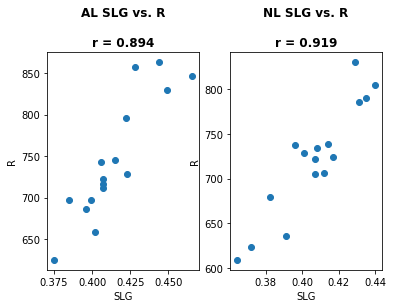

In [ ]:
plt.subplot(1, 2, 1) # row 1, col 3 index 1

plt.scatter(df.SLG,df.R)
plt.title("""AL SLG vs. R\n
r = 0.894""",fontweight = 'bold')
plt.xlabel('SLG')
plt.ylabel('R')

plt.subplot(1, 2, 2) # row 1, col 3 index 3

plt.scatter(df3.SLG,df3.R)
plt.title("""NL SLG vs. R\n
r = 0.919""",fontweight = 'bold')
plt.xlabel('SLG')
plt.ylabel('R')

Text(0, 0.5, 'R')

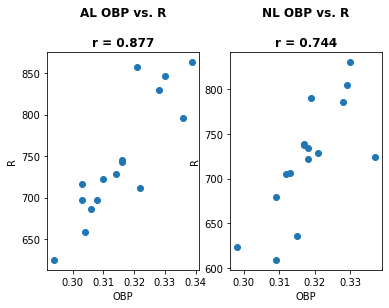

In [ ]:
plt.subplot(1, 2, 1) # row 1, col 3 index 1

plt.scatter(df.OBP,df.R)
plt.title("""AL OBP vs. R\n
r = 0.877""",fontweight = 'bold')
plt.xlabel('OBP')
plt.ylabel('R')

plt.subplot(1, 2, 2) # row 1, col 3 index 3

plt.scatter(df3.OBP,df3.R)
plt.title("""NL OBP vs. R\n
r = 0.744""",fontweight = 'bold')
plt.xlabel('OBP')
plt.ylabel('R')

Text(0, 0.5, 'R')

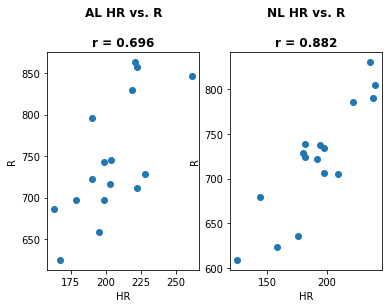

In [ ]:
plt.subplot(1, 2, 1) # row 1, col 3 index 1

plt.scatter(df.HR,df.R)
plt.title("""AL HR vs. R\n
r = 0.696""",fontweight = 'bold')
plt.xlabel('HR')
plt.ylabel('R')

plt.subplot(1, 2, 2) # row 1, col 3 index 3

plt.scatter(df3.HR,df3.R)
plt.title("""NL HR vs. R\n
r = 0.882""",fontweight = 'bold')
plt.xlabel('HR')
plt.ylabel('R')

In [ ]:
selected_columns = df[["R","SLG"]]
df_k = selected_columns.copy()

Text(0.5, 1.0, 'AL R vs. SLG K Means')

<Figure size 7200x7200 with 0 Axes>

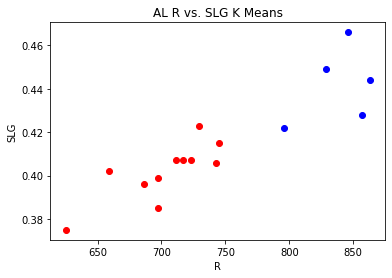

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_k)
#predictions from k_means
labels = kmeans.predict(df_k)
frame = pd.DataFrame(df_k)
frame['Cluster'] = labels
frame.columns = ['R', 'SLG', 'Cluster']
color=['red','blue','green','grey']
plt.figure(figsize=(100,100))
fig, ax = plt.subplots()
ax = plt.gca()
for k in range(0,3):
  df_k2 = frame[frame["Cluster"]==k]
  ax.scatter(df_k2["R"],df_k2["SLG"],c=color[k])
plt.xlabel('R')
plt.ylabel('SLG')
plt.title('AL R vs. SLG K Means')

Text(0.5, 1.0, 'NL R vs. SLG K Means')

<Figure size 7200x7200 with 0 Axes>

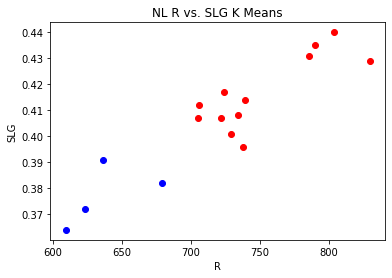

In [ ]:
selected_columns = df3[["R","SLG"]]
df_k2 = selected_columns.copy()
kmeans.fit(df_k2)
#predictions from k_means
labels2 = kmeans.predict(df_k2)
frame2 = pd.DataFrame(df_k2)
frame2['Cluster'] = labels2
frame2.columns = ['R', 'SLG', 'Cluster']
color=['red','blue','green','grey']
plt.figure(figsize=(100,100))
fig, ax = plt.subplots()
ax = plt.gca()
for k in range(0,3):
  df_k3 = frame2[frame2["Cluster"]==k]
  ax.scatter(df_k3["R"],df_k3["SLG"],c=color[k])
plt.xlabel('R')
plt.ylabel('SLG')
plt.title('NL R vs. SLG K Means')

Text(0, 0.5, 'Dissimilarity')

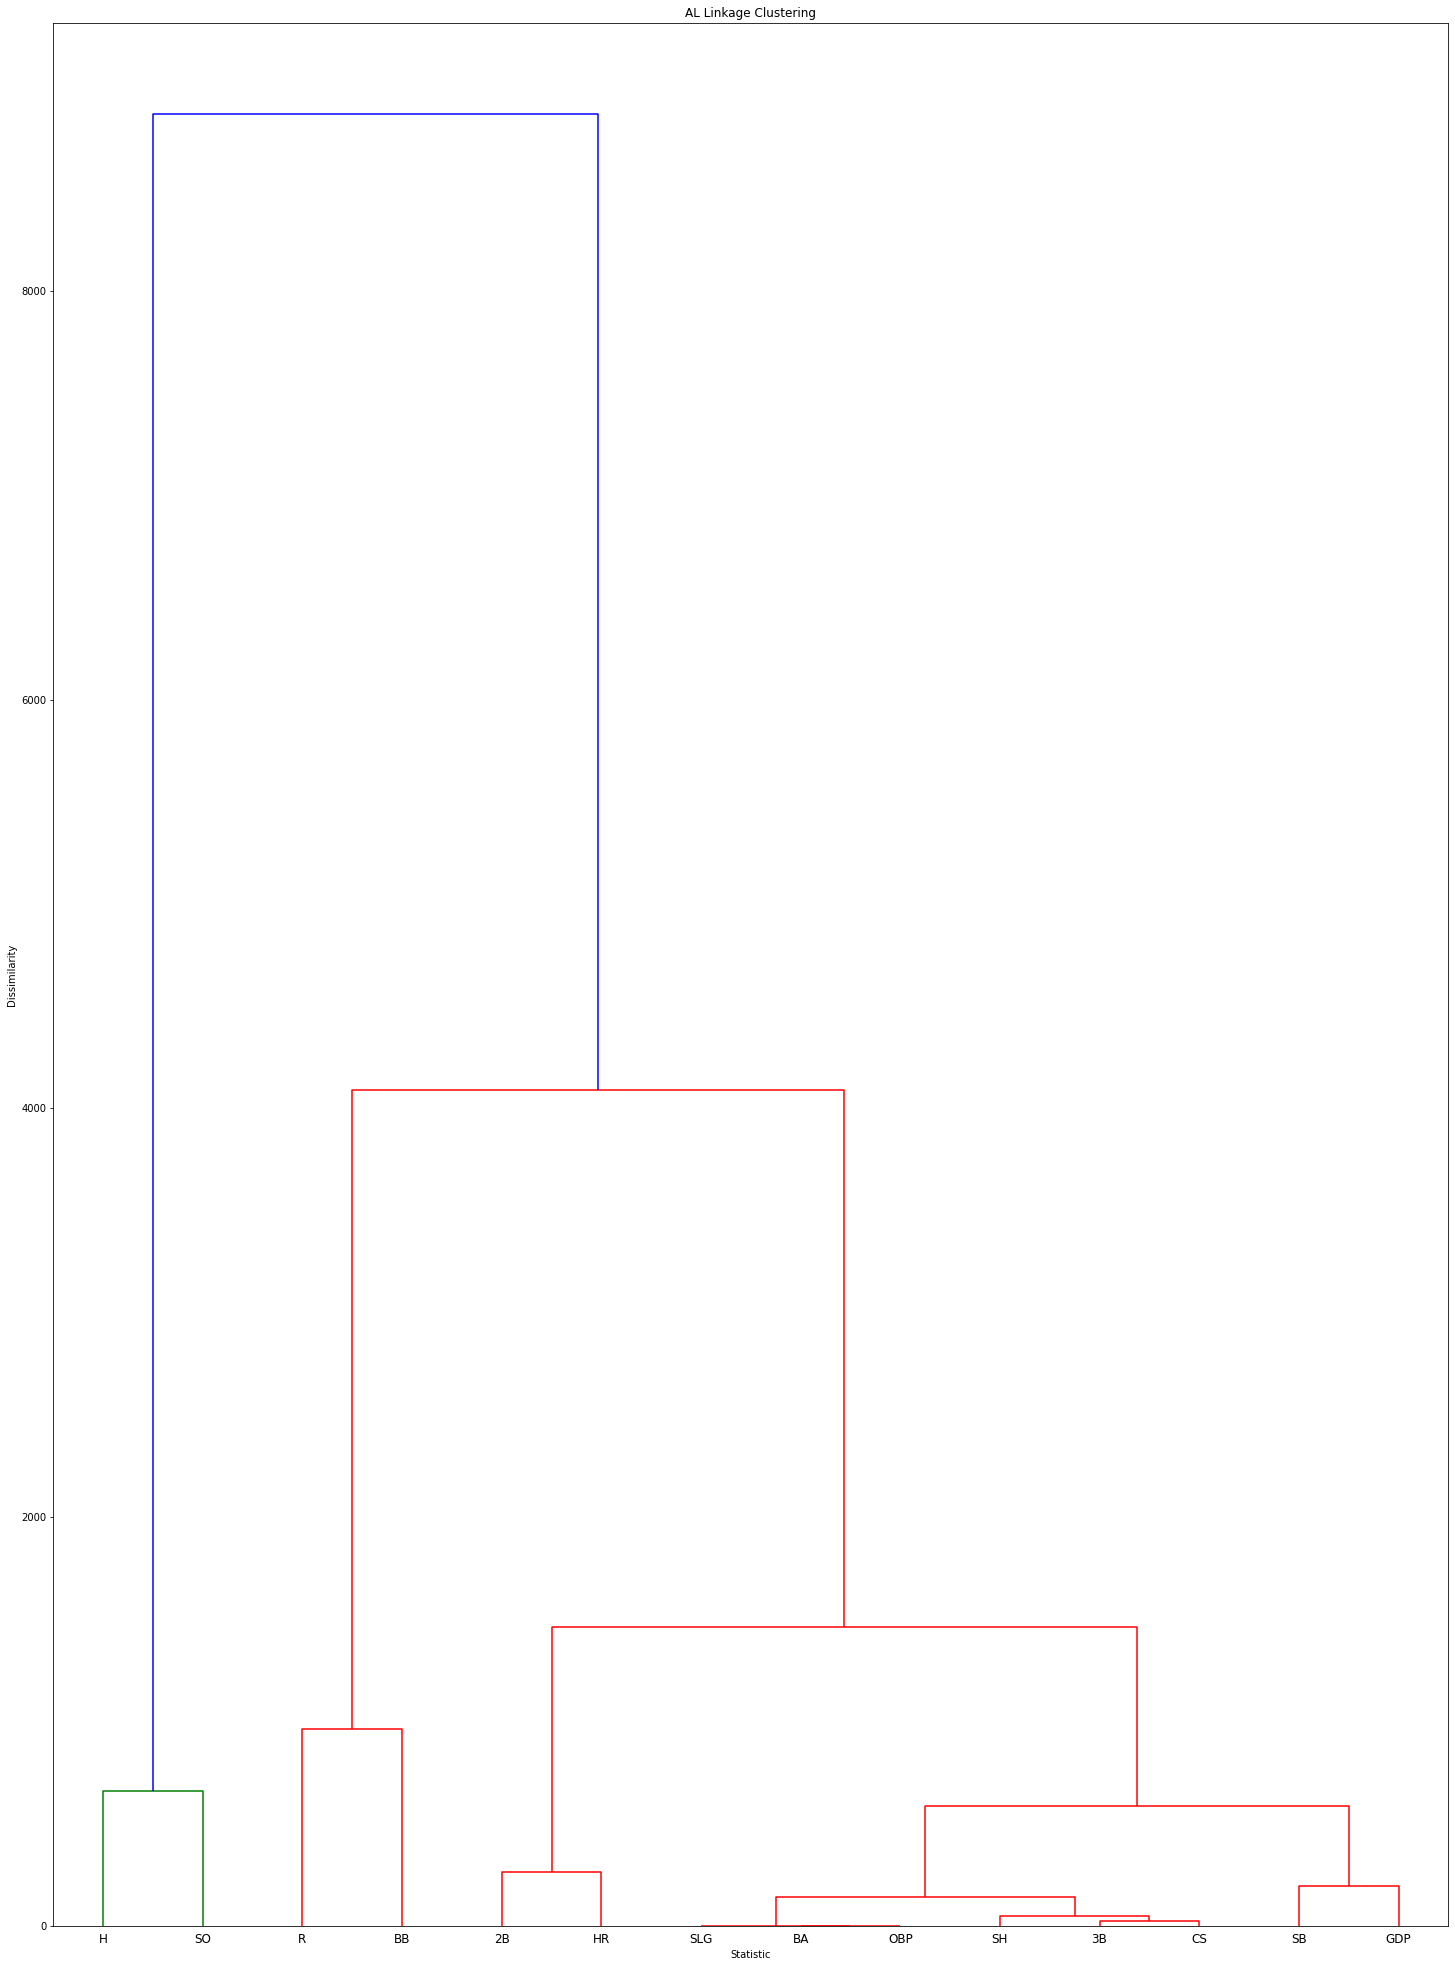

In [ ]:
df_dn = pd.read_csv("Batting Statistics - AL Standard.csv", index_col = "Tm")
df_dn.drop(df.columns[[1,2,3,4,5,6,12,20,21,22,24,26,27,28,29]], axis = 1, inplace = True)
df_dn = df_dn.T
Z = linkage(df_dn, 'ward')
fig = plt.figure(figsize=(25, 35))
dn = dendrogram(Z, labels = df_dn.index)
plt.title('AL Linkage Clustering')
plt.xlabel('Statistic')
plt.ylabel('Dissimilarity')

Text(0, 0.5, 'Dissimilarity')

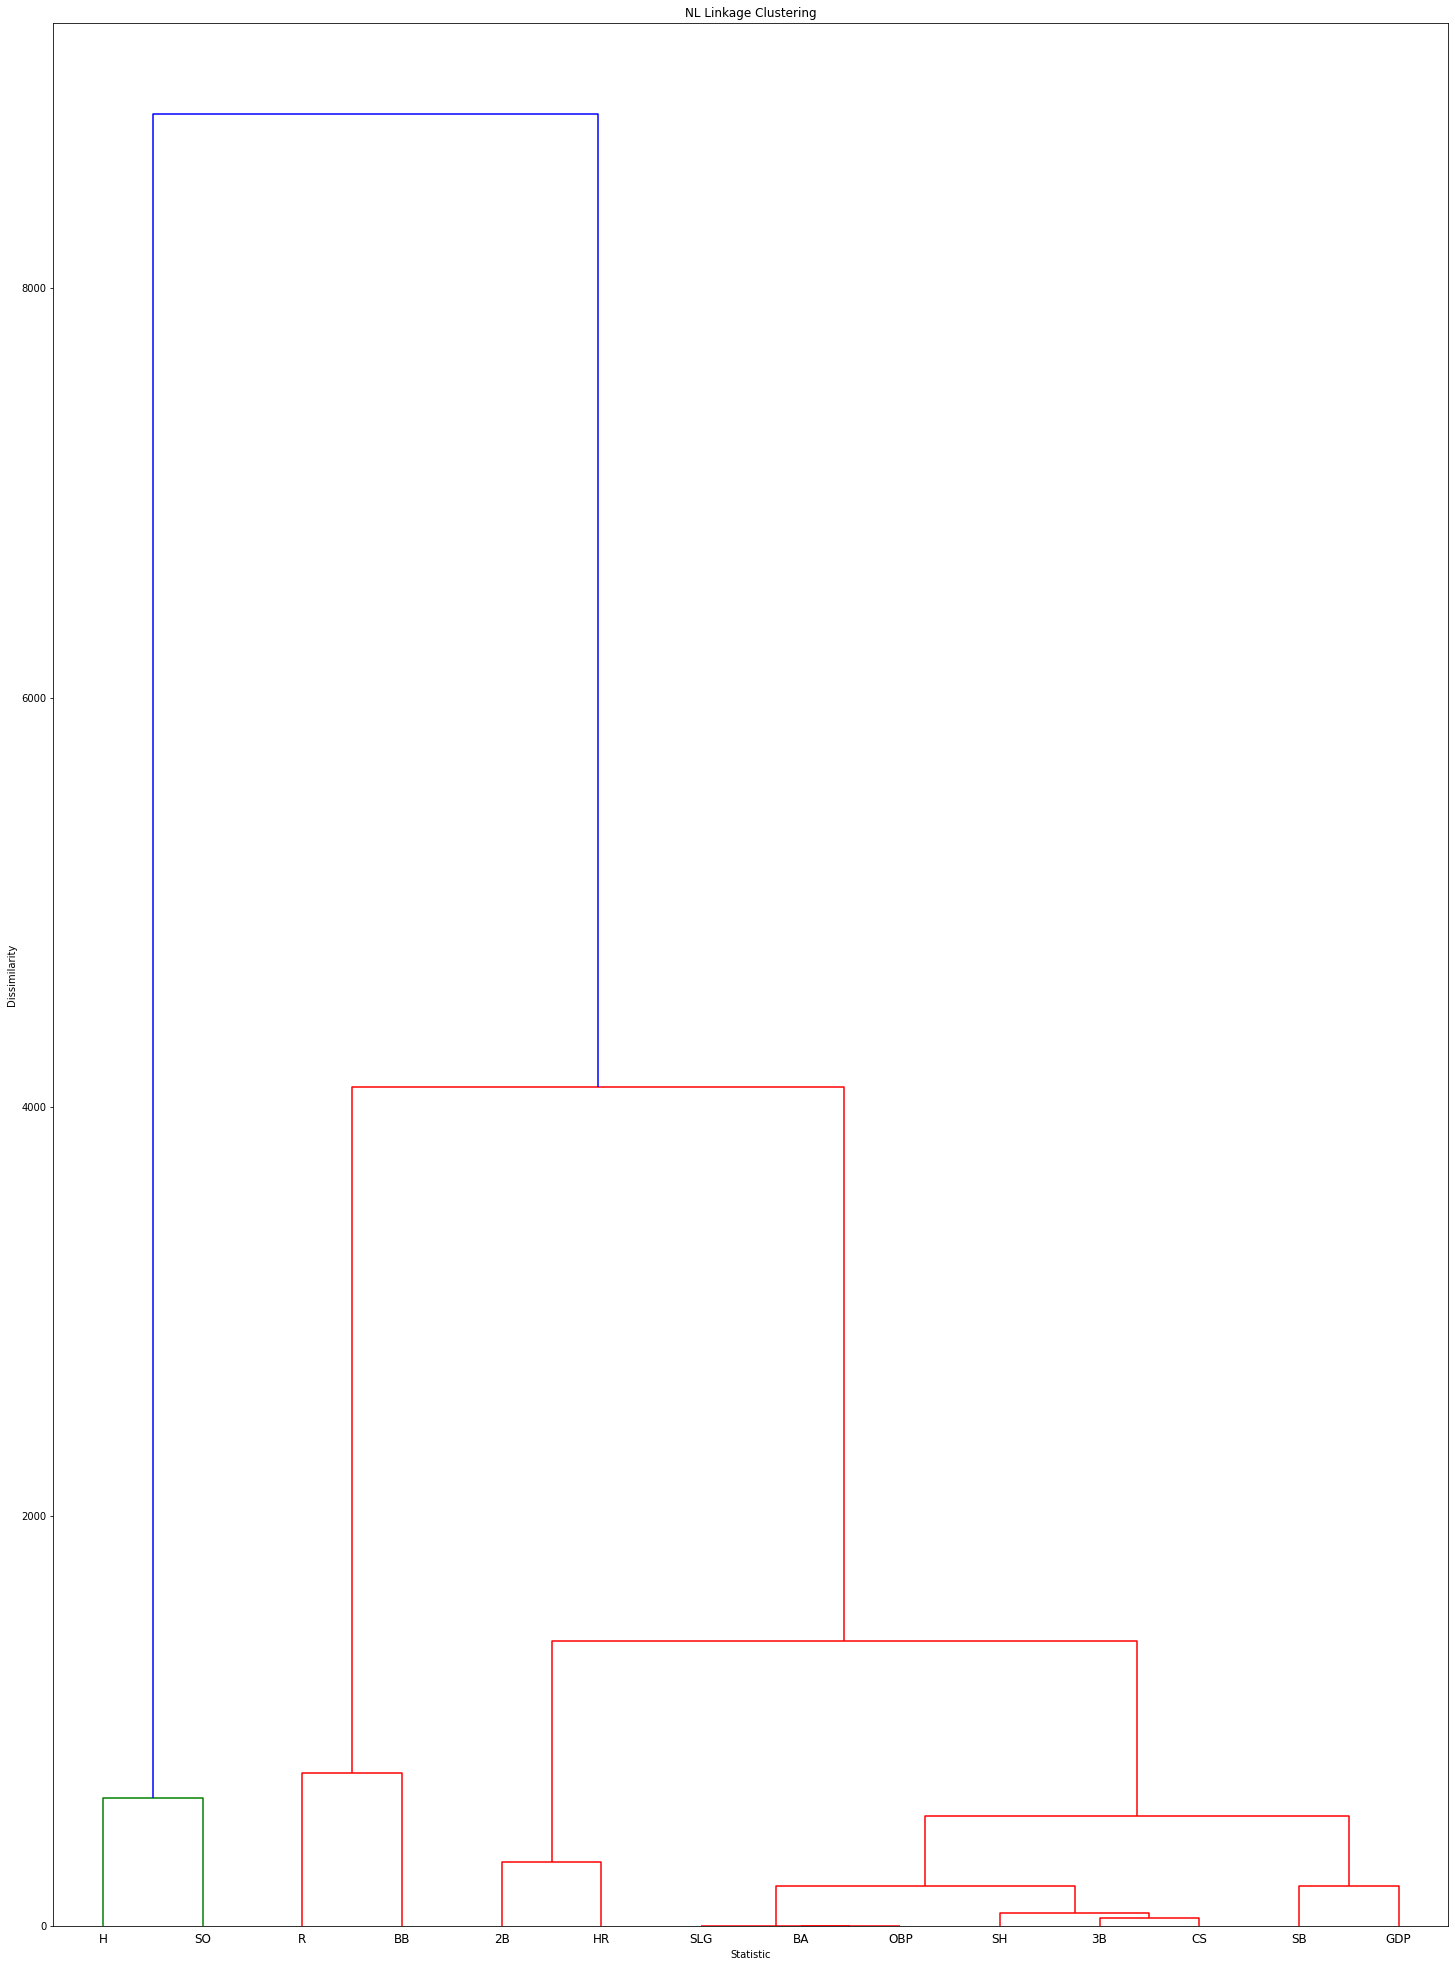

In [ ]:
df_dn2 = pd.read_csv("Batting Statistics - NL Standard.csv", index_col = "Tm")
df_dn2.drop(df.columns[[1,2,3,4,5,6,12,20,21,22,24,26,27,28]], axis = 1, inplace = True)
df_dn2 = df_dn2.T
Z2 = linkage(df_dn2, 'ward')
fig = plt.figure(figsize=(25, 35))
dn2 = dendrogram(Z2, labels = df_dn2.index)
plt.title('NL Linkage Clustering')
plt.xlabel('Statistic')
plt.ylabel('Dissimilarity')

Text(0.5, 1.0, 'AL R vs. OBP GMM')

<Figure size 7200x7200 with 0 Axes>

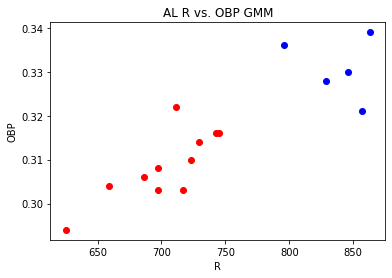

In [ ]:
from sklearn.mixture import GaussianMixture
df_g = pd.read_csv("Batting Statistics - AL Standard.csv", index_col = "Tm")
selected_columns = df[["R","OBP"]]
dfg = selected_columns.copy()
gmm = GaussianMixture(n_components = 2)
gmm.fit(dfg)
#predictions from gmm
labels_gmm = gmm.predict(dfg)
frame_gmm = pd.DataFrame(dfg)
frame_gmm['Cluster'] = labels_gmm
frame_gmm.columns = ['R', 'OBP', 'Cluster']
plt.figure(figsize=(100,100))
color=['red','blue','green','grey']
fig, ax = plt.subplots()
ax = plt.gca()
for k in range(0,3):
  dfg2 = frame_gmm[frame_gmm["Cluster"]==k]
  ax.scatter(dfg2["R"],dfg2["OBP"],c=color[k])
plt.xlabel('R')
plt.ylabel('OBP')
plt.title('AL R vs. OBP GMM')

Text(0.5, 1.0, 'NL R vs. HR GMM')

<Figure size 7200x7200 with 0 Axes>

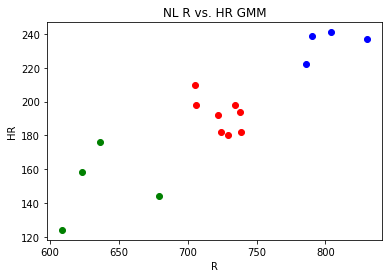

In [ ]:
df_gn = pd.read_csv("Batting Statistics - NL Standard.csv", index_col = "Tm")
selected_columns = df_gn[["R","HR"]]
dfgn = selected_columns.copy()
gmm = GaussianMixture(n_components = 3)
gmm.fit(dfgn)
#predictions from gmm
labels_gmm = gmm.predict(dfgn)
frame_gmm = pd.DataFrame(dfgn)
frame_gmm['Cluster'] = labels_gmm
frame_gmm.columns = ['R', 'HR', 'Cluster']
plt.figure(figsize=(100,100))
color=['red','blue','green','grey']
fig, ax = plt.subplots()
ax = plt.gca()
for k in range(0,3):
  dfgn2 = frame_gmm[frame_gmm["Cluster"]==k]
  ax.scatter(dfgn2["R"],dfgn2["HR"],c=color[k])
plt.xlabel('R')
plt.ylabel('HR')
plt.title('NL R vs. HR GMM')

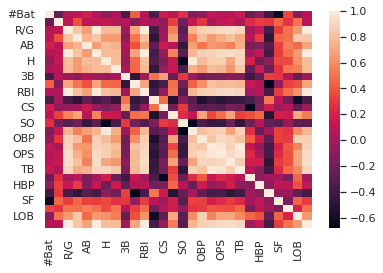

In [ ]:
import seaborn as sns; sns.set_theme()

ax = sns.heatmap(corrs)

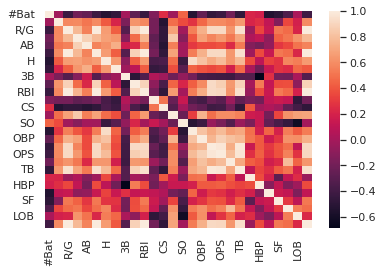

In [ ]:
ax = sns.heatmap(corrs_NL)

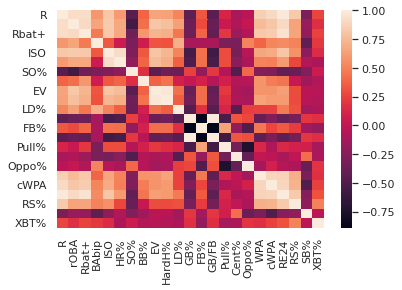

In [ ]:
ax = sns.heatmap(corrs_ALA)

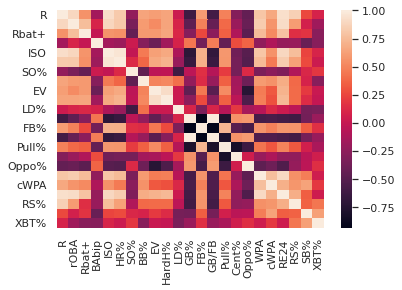

In [ ]:
sns.heatmap(corrs_NLA)

In [ ]:
# Create function for t-Test

def ttest(x,y):

  n1, n2 = len(x),len(y)

  dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
  t_obs, p = stats.ttest_ind(x, y, equal_var = False)
  t_left = t.ppf(q=.05,df=dof)
  t_right = t.ppf(q=.95,df=dof)

  print(p)

  # Plot PDF

  plt.suptitle(f"BSN Expression with DF = %d" %dof)
  fig, ax = plt.subplots(1, 1)
  z = np.linspace(t.ppf(0.001, dof),
                  t.ppf(0.999, dof), 100)
  ax.plot(z, t.pdf(z, dof),'dg-',
          lw = 20, alpha=0.05, label='t pdf')
  rv = t(dof)
  ax.plot(z, rv.pdf(z), 'k-', lw=2, label='frozen pdf')
  plt.vlines(t_obs, 0, .5, "b", linestyles='dashed', label='t_obs')
  ax.fill_between(z, rv.pdf(z),0,
                  where = (z < t_left),
                  color = 'red', label = 'critical region')
  ax.fill_between(z, rv.pdf(z),0,
                  where = (z > t_right),
                  color = 'red')
  ax.legend(loc='upper left', frameon=False)
  plt.title('AL vs. NL: SH',fontweight = 'bold')
  plt.ylabel("Density")
  plt.xlabel("t Value")

  plt.show()

3.6538895487756854e-09


<Figure size 432x288 with 0 Axes>

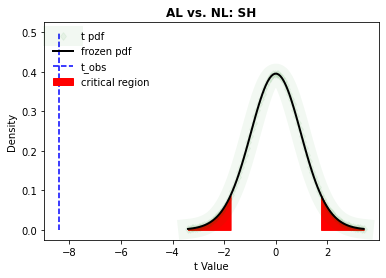

In [ ]:
ttest(df.SH,df3.SH)

In [ ]:
columns = list(df)
columns.remove('Tm')
columns.remove('RSQ')

for i in columns:
  ttest(df[i],df3[i])

0.23436265536727258
0.07317287179100267
0.36106148130430016
0.16387561365565362
0.8339997199453196
0.049499391463059775
0.34588294619272886
0.19980896277854665
0.7282141168921918
0.2972058297762501
0.2728671594006561
0.37648001717539015
0.48056174298815624
0.724776162689312
0.1468576071638316
0.4049213982344013
0.37594512469379404
0.5385363743219209
0.34111531829132946
0.6446099586957337
0.10642932818605885
0.22035842172458214
0.875621145720695
0.051830439282075196
3.6538895487756854e-09
0.21926451674725728
2.4453497583506277e-05
0.010469917976856707
